In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os

os.chdir('C:/Users/luken/Desktop/NHL_Model')

print(os.getcwd())

C:\Users\luken\Desktop\NHL_Model


In [14]:
import os
import pandas as pd


input_directory = "C:/Users/luken/Desktop/NHL_Model/Raw_data/"


base_output_directory = "C:/Users/luken/Desktop/NHL_Model/Sorted_data"
#iterate through the files and create new files for each team's games for each year
for file_name in os.listdir(input_directory):
    if file_name.endswith(".csv"):
        year = file_name.split('_games.csv')[0]

        year_directory = os.path.join(base_output_directory, year)
        if not os.path.exists(year_directory):
            os.makedirs(year_directory)

        file_path = os.path.join(input_directory, file_name)
        df = pd.read_csv(file_path)
        df[['Date', 'AwayTeam', 'AwayScore', 'HomeTeam', 'HomeScore']] = df['Game'].str.extract(r'(\d{4}-\d{2}-\d{2}) - (\w+) (\d+), (\w+) (\d+)')
        df['HomeResult'] = 'Draw'
        df.loc[df['HomeScore'] > df['AwayScore'], 'HomeResult'] = 'Won'
        df.loc[df['HomeScore'] < df['AwayScore'], 'HomeResult'] = 'Lost'



        team_subsets = {team: df[df['Team'] == team] for team in df['Team'].unique()}

        for team, subset in team_subsets.items():
            team_file_name = f"{team}_games.csv"
            team_file_path = os.path.join(year_directory, team_file_name)
            subset.to_csv(team_file_path, index=False)

print(f"CSV files organized by year and saved in {base_output_directory}")

CSV files organized by year and saved in C:/Users/luken/Desktop/NHL_Model/Sorted_data


In [4]:
# Directory where your input CSV files are located
input_directory = "C:/Users/luken/Desktop/NHL_Model/Raw_data/"

# List to store individual DataFrames
dfs = []

# Iterate over all files in the input directory
for file_name in os.listdir(input_directory):
    if file_name.endswith(".csv"):
        file_path = os.path.join(input_directory, file_name)
        
        # Read the CSV file into a DataFrame and append to the list
        dfs.append(pd.read_csv(file_path))

# Concatenate all the individual DataFrames into one
all_df = pd.concat(dfs, ignore_index=True)
all_df[['Date', 'AwayTeam', 'AwayScore', 'HomeTeam', 'HomeScore']] = all_df['Game'].str.extract(r'(\d{4}-\d{2}-\d{2}) - (\w+) (\d+), (\w+) (\d+)')
all_df['HomeResult'] = 'Draw'
all_df.loc[all_df['HomeScore'] > all_df['AwayScore'], 'HomeResult'] = 'Won'
all_df.loc[all_df['HomeScore'] < all_df['AwayScore'], 'HomeResult'] = 'Lost'
all_df.head()

,Game,Team,Unnamed: 2,TOI,CF,CA,CF%,FF,FA,FF%,...,SH%,SV%,PDO,Attendance,Date,AwayTeam,AwayScore,HomeTeam,HomeScore,HomeResult
0,"2021-01-13 - Penguins 3, Flyers 6",Philadelphia Flyers,Limited ReportFull Report,60.0,46,54,46.00,35,41,46.05,...,22.22,91.18,1.134,0,2021-01-13,Penguins,3,Flyers,6,Won
1,"2021-01-13 - Penguins 3, Flyers 6",Pittsburgh Penguins,Limited ReportFull Report,60.0,54,46,54.00,41,35,53.95,...,8.82,77.78,0.866,0,2021-01-13,Penguins,3,Flyers,6,Won
2,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,Limited ReportFull Report,60.0,41,46,47.13,29,39,42.65,...,4.35,84.85,0.892,0,2021-01-13,Blackhawks,1,Lightning,5,Won
3,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,Limited ReportFull Report,60.0,46,41,52.87,39,29,57.35,...,15.15,95.65,1.108,0,2021-01-13,Blackhawks,1,Lightning,5,Won
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,Limited ReportFull Report,63.4,62,74,45.59,45,52,46.39,...,12.50,85.29,0.978,0,NaN,NaN,NaN,NaN,NaN,Draw


In [12]:
columns_list = all_df.columns.tolist()
print(columns_list)

['Game', 'Team', 'Unnamed: 2', 'TOI', 'CF', 'CA', 'CF%', 'FF', 'FA', 'FF%', 'SF', 'SA', 'SF%', 'GF', 'GA', 'GF%', 'xGF', 'xGA', 'xGF%', 'SCF', 'SCA', 'SCF%', 'HDCF', 'HDCA', 'HDCF%', 'HDSF', 'HDSA', 'HDSF%', 'HDGF', 'HDGA', 'HDGF%', 'HDSH%', 'HDSV%', 'MDCF', 'MDCA', 'MDCF%', 'MDSF', 'MDSA', 'MDSF%', 'MDGF', 'MDGA', 'MDGF%', 'MDSH%', 'MDSV%', 'LDCF', 'LDCA', 'LDCF%', 'LDSF', 'LDSA', 'LDSF%', 'LDGF', 'LDGA', 'LDGF%', 'LDSH%', 'LDSV%', 'SH%', 'SV%', 'PDO', 'Attendance', 'Date', 'AwayTeam', 'AwayScore', 'HomeTeam', 'HomeScore', 'HomeResult']


In [7]:
for col in all_df.columns:
    try:
        all_df[col] = all_df[col].astype(float)
        print(f"Converted column '{col}' to float.")
    except ValueError:
        print(f"Could not convert column '{col}' to float.")
        # Ignore columns that can't be converted to float
        pass

Could not convert column 'Game' to float.
Could not convert column 'Team' to float.
Could not convert column 'Unnamed: 2' to float.
Converted column 'TOI' to float.
Converted column 'CF' to float.
Converted column 'CA' to float.
Converted column 'CF%' to float.
Converted column 'FF' to float.
Converted column 'FA' to float.
Converted column 'FF%' to float.
Converted column 'SF' to float.
Converted column 'SA' to float.
Converted column 'SF%' to float.
Converted column 'GF' to float.
Converted column 'GA' to float.
Could not convert column 'GF%' to float.
Converted column 'xGF' to float.
Converted column 'xGA' to float.
Converted column 'xGF%' to float.
Converted column 'SCF' to float.
Converted column 'SCA' to float.
Converted column 'SCF%' to float.
Converted column 'HDCF' to float.
Converted column 'HDCA' to float.
Converted column 'HDCF%' to float.
Converted column 'HDSF' to float.
Converted column 'HDSA' to float.
Converted column 'HDSF%' to float.
Converted column 'HDGF' to float.

In [43]:
columns_keep = ['CF', 'CA', 'FF', 'FA', 'SF', 'SA', 'GF', 'GA', 'xGF', 'xGA', 'SCF', 'SCA', 'HDCF', 'HDCA', 'HDSF', 'HDSA', 'HDGF', 'HDGA', 'MDCF', 'MDCA', 'MDSF', 'MDSA', 'MDGF', 'MDGA', 'LDCF', 'LDCA', 'LDSF', 'LDSA', 'LDGF', 'LDGA', 'PDO']
df_corr = all_df[columns_keep]
matrix = df_corr.corr()
print(matrix)

            CF        CA        FF        FA        SF        SA        GF  \
CF    1.000000 -0.100384  0.914472 -0.109105  0.809522 -0.100427  0.226801   
CA   -0.100384  1.000000 -0.109105  0.914472 -0.100427  0.809522 -0.066854   
FF    0.914472 -0.109105  1.000000 -0.102175  0.893793 -0.093802  0.267034   
FA   -0.109105  0.914472 -0.102175  1.000000 -0.093802  0.893793 -0.055898   
SF    0.809522 -0.100427  0.893793 -0.093802  1.000000 -0.063305  0.308323   
SA   -0.100427  0.809522 -0.093802  0.893793 -0.063305  1.000000 -0.051996   
GF    0.226801 -0.066854  0.267034 -0.055898  0.308323 -0.051996  1.000000   
GA   -0.066854  0.226801 -0.055898  0.267034 -0.051996  0.308323 -0.014610   
xGF   0.708812 -0.073295  0.767844 -0.074676  0.717761 -0.069583  0.323550   
xGA  -0.073295  0.708812 -0.074676  0.767844 -0.069583  0.717761 -0.039886   
SCF   0.755829 -0.077299  0.730352 -0.079718  0.661531 -0.072569  0.268465   
SCA  -0.077299  0.755829 -0.079718  0.730352 -0.072569  0.661531

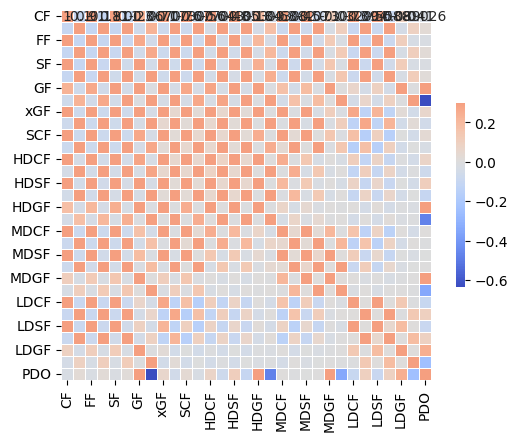

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matrix, cmap="coolwarm", vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [10]:
df = pd.read_csv('sorted_data/22_23/Anaheim Ducks_games.csv')

# 2. Convert the date column to a pandas datetime object
# Assuming your date column is named 'date'
df['Date'] = pd.to_datetime(df['Date'])

# 3. Calculate the difference between each game's date
# The result will be a timedelta object
df['time_diff'] = df['Date'].diff()

# 4. Convert the timedelta object to integer for days of rest
df['days_of_rest'] = df['time_diff'].dt.days - 1  # Subtract 1 because we want days of rest, not days between games

# Check the DataFrame
df.head()

,Game,Team,Unnamed: 2,TOI,CF,CA,CF%,FF,FA,FF%,...,PDO,Attendance,Date,AwayTeam,AwayScore,HomeTeam,HomeScore,HomeResult,time_diff,days_of_rest
0,"2022-10-12 - Kraken 4, Ducks 5",Anaheim Ducks,Limited ReportFull Report,60.916667,44,78,36.07,32,62,34.04,...,1.102,17530,2022-10-12,Kraken,4.0,Ducks,5.0,Won,NaT,NaN
1,"2022-10-15 - Ducks 1, Islanders 7",Anaheim Ducks,Limited ReportFull Report,60.000000,57,68,45.60,37,54,40.66,...,0.859,16487,2022-10-15,Ducks,1.0,Islanders,7.0,Won,3 days,2.0
2,"2022-10-17 - Ducks 4, Rangers 6",Anaheim Ducks,Limited ReportFull Report,60.000000,38,70,35.19,25,58,30.12,...,1.042,18006,2022-10-17,Ducks,4.0,Rangers,6.0,Won,2 days,1.0
3,"2022-10-18 - Ducks 2, Devils 4",Anaheim Ducks,Limited ReportFull Report,60.000000,35,67,34.31,28,54,34.15,...,1.002,10130,2022-10-18,Ducks,2.0,Devils,4.0,Won,1 days,0.0
4,"2022-10-20 - Ducks 1, Bruins 2",Anaheim Ducks,Limited ReportFull Report,65.000000,49,61,44.55,39,46,45.88,...,1.004,17850,2022-10-20,Ducks,1.0,Bruins,2.0,Won,2 days,1.0


In [15]:
root_dir = 'sorted_data/'

# List all subdirectories inside the root directory
subfolders = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

for subfolder in subfolders:
    dir_path = os.path.join(root_dir, subfolder)
    
    # List all files in the subdirectory
    all_files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f)) and f.endswith('.csv')]

    for file in all_files:
        file_path = os.path.join(dir_path, file)
        
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)
        
        # Identify the date column - replace 'date' with the correct column name if it's different
        if 'Date' in df.columns:
            date_col = 'Date'
        else:
            print(f"Cannot find date column in file {file} inside {subfolder}. Skipping...")
            continue

        # Convert the date column to a pandas datetime object
        df[date_col] = pd.to_datetime(df[date_col])

        # Calculate the difference between each game's date
        df['time_diff'] = df[date_col].diff()

        # Convert the timedelta object to integer for days of rest
        df['days_of_rest'] = df['time_diff'].dt.days - 1

        # Optional: Save the updated DataFrame back to the same CSV or to a different location
        df.to_csv(file_path, index=False)

        print(f"Processed {file} inside {subfolder}")

Processed Anaheim Ducks_games.csv inside 20_21
Processed Arizona Coyotes_games.csv inside 20_21
Processed Boston Bruins_games.csv inside 20_21
Processed Buffalo Sabres_games.csv inside 20_21
Processed Calgary Flames_games.csv inside 20_21
Processed Carolina Hurricanes_games.csv inside 20_21
Processed Chicago Blackhawks_games.csv inside 20_21
Processed Colorado Avalanche_games.csv inside 20_21
Processed Columbus Blue Jackets_games.csv inside 20_21
Processed Dallas Stars_games.csv inside 20_21
Processed Detroit Red Wings_games.csv inside 20_21
Processed Edmonton Oilers_games.csv inside 20_21
Processed Florida Panthers_games.csv inside 20_21
Processed Los Angeles Kings_games.csv inside 20_21
Processed Minnesota Wild_games.csv inside 20_21
Processed Montreal Canadiens_games.csv inside 20_21
Processed Nashville Predators_games.csv inside 20_21
Processed New Jersey Devils_games.csv inside 20_21
Processed New York Islanders_games.csv inside 20_21
Processed New York Rangers_games.csv inside 20

In [ ]:
['Game', 'Team', 'CF', 'CA', 'FF', 'FA', 'SF', 'SA', 'GF', 'GA', 'xGF', 'xGA', 'SCF', 'SCA', 'HDCF', 'HDCA', 'HDSF', 'HDSA', 'HDGF', 'HDGA', 'HDSH%', 'HDSV%', 'MDCF', 'MDCA', 'MDSF', 'MDSA', 'MDGF', 'MDGA', 'MDSH%', 'MDSV%', 'LDCF', 'LDCA', 'LDSF', 'LDSA', 'LDSF%', 'LDGF', 'LDGA', 'LDSH%', 'LDSV%', 'SH%', 'SV%', 'PDO', 'Date', 'AwayTeam', 'AwayScore', 'HomeTeam', 'HomeScore', 'HomeResult', 'days_of_rest']

In [16]:
import os

# Directory containing all the subfolders with CSV files
root_dir = 'sorted_data/'

# List all subdirectories inside the root directory
subfolders = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

for subfolder in subfolders:
    dir_path = os.path.join(root_dir, subfolder)
    
    # Create a new directory for the modified files, if it doesn't exist
    new_dir_path = os.path.join(root_dir, f'avg_{subfolder}')
    if not os.path.exists(new_dir_path):
        os.makedirs(new_dir_path)
    
    # List all files in the subdirectory
    all_files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f)) and f.endswith('.csv')]

    for file in all_files:
        file_path = os.path.join(dir_path, file)
        
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)
        
        # Identify the date column - replace 'date' with the correct column name if it's different
        if 'Date' in df.columns:
            date_col = 'Date'
        else:
            print(f"Cannot find date column in file {file} inside {subfolder}. Skipping...")
            continue

        # Convert the date column to a pandas datetime object
        df[date_col] = pd.to_datetime(df[date_col])

        # Assuming your stats columns are numeric, filter out non-numeric columns (like 'date')
        stat_cols = df.select_dtypes(include=['number']).columns

        # Compute rolling averages for each of the stats columns
        for col in stat_cols:
            df[f'avg_{col}'] = df[col].rolling(window=10).mean().shift(1)  # shift(1) to exclude current game in average

        # Save the updated DataFrame to the new directory
        df.to_csv(os.path.join(new_dir_path, file), index=False)

        print(f"Processed {file} inside {subfolder} and saved to avg_{subfolder}")

Processed Anaheim Ducks_games.csv inside 20_21 and saved to avg_20_21
Processed Arizona Coyotes_games.csv inside 20_21 and saved to avg_20_21
Processed Boston Bruins_games.csv inside 20_21 and saved to avg_20_21
Processed Buffalo Sabres_games.csv inside 20_21 and saved to avg_20_21
Processed Calgary Flames_games.csv inside 20_21 and saved to avg_20_21
Processed Carolina Hurricanes_games.csv inside 20_21 and saved to avg_20_21
Processed Chicago Blackhawks_games.csv inside 20_21 and saved to avg_20_21
Processed Colorado Avalanche_games.csv inside 20_21 and saved to avg_20_21
Processed Columbus Blue Jackets_games.csv inside 20_21 and saved to avg_20_21
Processed Dallas Stars_games.csv inside 20_21 and saved to avg_20_21
Processed Detroit Red Wings_games.csv inside 20_21 and saved to avg_20_21
Processed Edmonton Oilers_games.csv inside 20_21 and saved to avg_20_21
Processed Florida Panthers_games.csv inside 20_21 and saved to avg_20_21
Processed Los Angeles Kings_games.csv inside 20_21 and

In [19]:
import os
import pandas as pd

# Define the directory names where your CSV files are located
directories = ['avg_20_21', 'avg_21_22', 'avg_22_23']

# Assuming the directories are in your current working directory, otherwise, provide the full path
base_directory = "C:/Users/luken/Desktop/NHL_Model/Sorted_data/"  # Replace with the path to the directories

# Iterate over the directories
for directory in directories:
    # Create the full path to the directory
    directory_path = os.path.join(base_directory, directory)
    
    # List all files in the directory
    csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
    
    # Iterate over the CSV files
    for file_name in csv_files:
        # Create the full path to the CSV file
        file_path = os.path.join(directory_path, file_name)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Select columns containing 'avg' and the 'Game' column
        columns_to_select = ['Game'] + [col for col in df.columns if 'avg' in col]
        selected_df = df[columns_to_select]

        # Define the name for the new CSV file
        new_file_name = f"avg_{file_name}"
        new_file_path = os.path.join(directory_path, new_file_name)

        # Write the selected columns to the new CSV file
        selected_df.to_csv(new_file_path, index=False)